# HW02 — Анализ и визуализация данных

В этом ноутбуке выполняются задания:
- загрузка и первичный осмотр датасета,
- проверка пропусков, дубликатов и качества данных,
- базовый EDA (группировки и частоты),
- построение визуализаций в Matplotlib и сохранение одного графика.

## 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

## 2. Загрузка данных и первичный осмотр

In [2]:
# Загрузка датасета (файл должен лежать рядом с ноутбуком)
df = pd.read_csv('S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## 3. Пропуски, дубликаты и базовый контроль качества

In [5]:
# Доля пропусков в каждом столбце
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [6]:
# Количество полностью дублирующих строк
df.duplicated().sum()

np.int64(1)

In [7]:
# Сами дублирующиеся строки
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [8]:
# Подозрительные значения: возраст < 0 или > 100
df[(df['age'] < 0) | (df['age'] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [9]:
# Подозрительные значения: отрицательные покупки или выручка
df[(df['purchases'] < 0) | (df['revenue'] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [10]:
# Логические противоречия: выручка > 0 при 0 покупок
df[(df['purchases'] == 0) & (df['revenue'] > 0)]

,user_id,age,country,purchases,revenue


### Комментарий по качеству данных

- Есть пропуски в `age`.
- Обнаружен нереалистичный возраст (например, 120 лет).
- Есть отрицательное значение `purchases`.
- Есть строки, где `revenue > 0` при `purchases == 0`.
- Присутствуют дублирующиеся строки.

Все эти аномалии потребуют очистки на следующих этапах анализа.

## 4. Базовый EDA: частоты и группировки

In [11]:
# Частоты стран
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [12]:
# Создание возрастных групп
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 20, 30, 40, 50, 60, 120],
    labels=['0–20', '21–30', '31–40', '41–50', '51–60', '60+']
)
df[['age', 'age_group']].head()

,age,age_group
0,25.0,21–30
1,24.0,21–30
2,52.0,51–60
3,31.0,31–40
4,NaN,NaN


In [13]:
# Средняя выручка по странам
df.groupby('country')['revenue'].agg(['mean', 'sum', 'count'])

,mean,sum,count
country,,,
CN,1054.000000,2108,2
DE,1445.500000,8673,6
FR,675.916667,8111,12
RU,790.076923,10271,13
US,557.375000,4459,8


In [14]:
# Среднее количество покупок по возрастным группам
df.groupby('age_group')['purchases'].mean()

C:\Users\gidak\AppData\Local\Temp\ipykernel_32388\1019549253.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['purchases'].mean()


age_group
0–20     6.333333
21–30    4.250000
31–40    6.000000
41–50    3.000000
51–60    5.000000
60+     -1.000000
Name: purchases, dtype: float64

### Комментарий к EDA

- По результатам `value_counts` видно, какие страны представлены больше.
- Средние значения выручки различаются по странам.
- Возрастные группы отличаются по средней активности (числу покупок).

Эти наблюдения помогают понять, какие сегменты пользователей наиболее ценные.

## 5. Визуализация данных в Matplotlib

### 5.1. Гистограмма распределения возраста

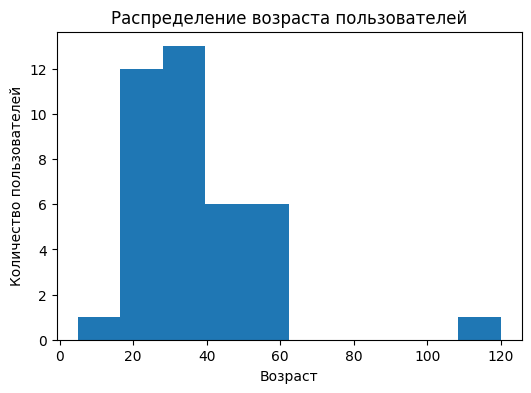

In [15]:
plt.figure(figsize=(6, 4))
plt.hist(df['age'].dropna(), bins=10)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

### 5.2. Boxplot для выручки

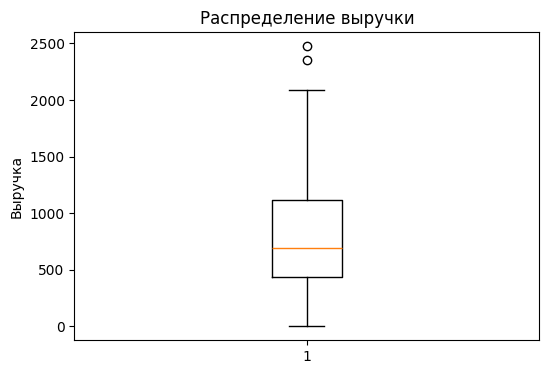

In [16]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['revenue'])
plt.title('Распределение выручки')
plt.ylabel('Выручка')
plt.show()

### 5.3. Scatter plot: количество покупок vs выручка

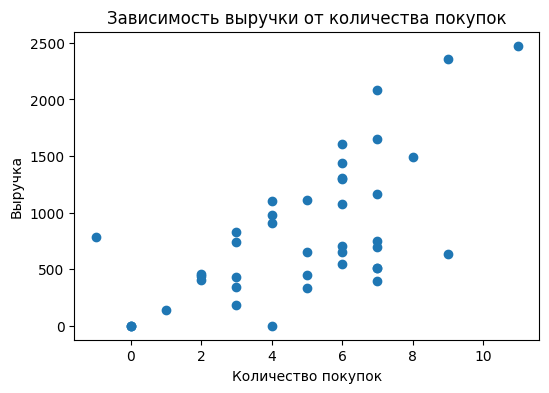

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(df['purchases'], df['revenue'])
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.show()

### 5.4. Сохранение графика в папку `figures/`

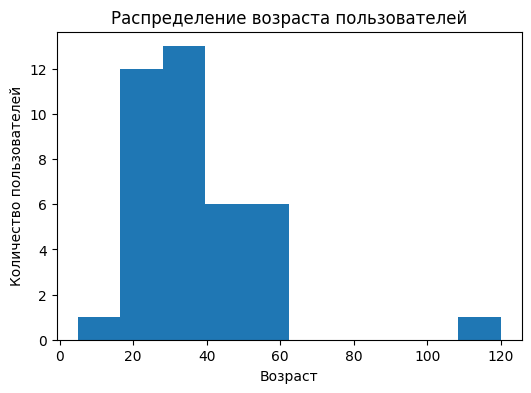

In [18]:
import os

os.makedirs('figures', exist_ok=True)

plt.figure(figsize=(6, 4))
plt.hist(df['age'].dropna(), bins=10)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

plt.savefig('figures/age_hist.png', dpi=150)
plt.show()